Use seaborn to get the iris data by using: iris = sns.load_dataset('iris')

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

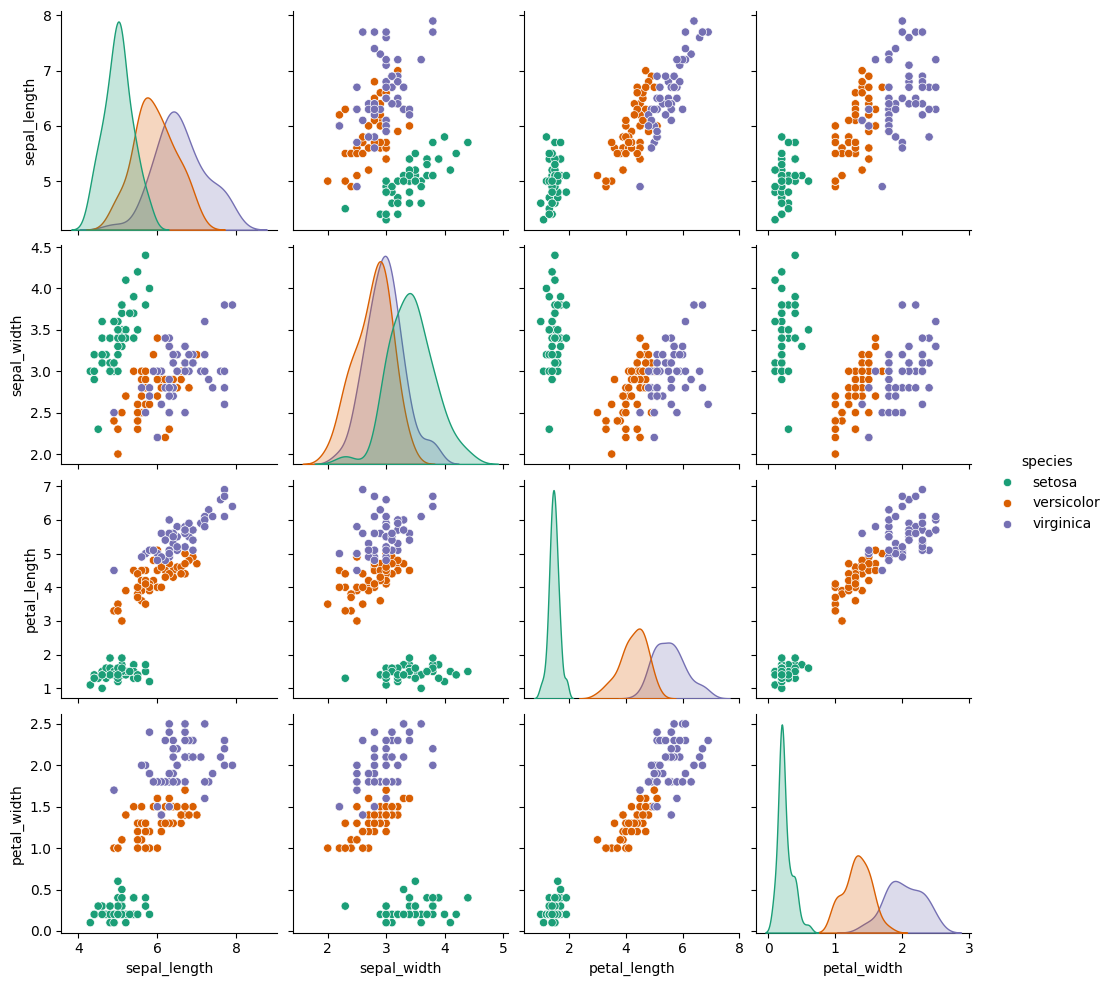

In [ ]:
# Setosa is the most separable.
sns.pairplot(iris,hue='species',palette='Dark2')

Create a kde plot of sepal_length versus sepal width for setosa species of flower.


<ipython-input-6-5ef27260cb0a>:2: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-6-5ef27260cb0a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

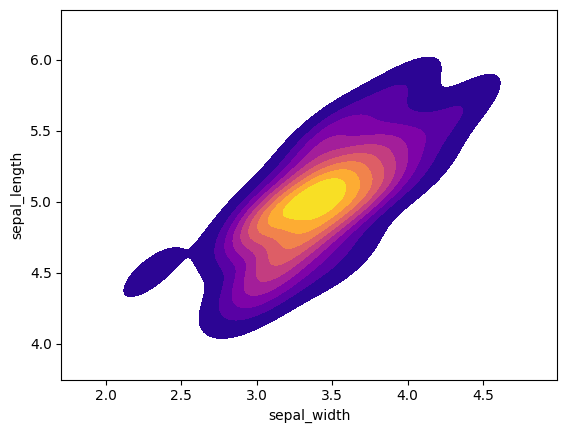

In [ ]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(
    data=setosa, # Pass the DataFrame as the 'data' argument
    x='sepal_width',
    y='sepal_length',
    cmap="plasma",
    shade=True,
    shade_lowest=False
)

# Train Test Split

**Split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

Now its time to train a Support Vector Machine Classifier.

Call the SVC() model from sklearn and fit the model to the training data.

In [10]:
svc_model = SVC()

In [11]:
svc_model.fit(X_train,y_train)

SVC()

# Model Evaluation

Now get predictions from the model and create a confusion matrix and a classification report.


In [12]:
predictions = svc_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0 16  0]
 [ 0  1 16]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Gridsearch Practice

**Import GridsearchCV from SciKit Learn.**

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

**Create a GridSearchCV object and fit it to the training data.**

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

**Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [19]:
grid_predictions = grid.predict(X_test)

In [20]:
print(confusion_matrix(y_test,grid_predictions))

[[12  0  0]
 [ 0 16  0]
 [ 0  1 16]]


In [21]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



You should have done about the same or exactly the same, this makes sense, there is basically just one point that is too noisey to grab, which makes sense, we don't want to have an overfit model that would be able to grab that.
